In [1]:
!pip install tensorflow pydot graphviz 
!pip install gradio

     --------------------------------------- 13.8/13.8 MB 12.1 MB/s eta 0:00:00
     ------------------------------------- 200.2/200.2 kB 12.7 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 33.7 MB/s eta 0:00:00
     ---------------------------------------- 101.4/101.4 kB ? eta 0:00:00
     ------------------------------------- 323.5/323.5 kB 19.6 MB/s eta 0:00:00
     ---------------------------------------- 56.9/56.9 kB 2.9 MB/s eta 0:00:00
     ------------------------------------- 812.8/812.8 kB 25.1 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 27.7 MB/s eta 0:00:00
     ---------------------------------------- 84.5/84.5 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 85.0/85.0 kB 4.7 MB/s eta 0:00:00
   

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import gradio as gr


In [3]:
heart_data = pd.read_csv('heart.csv')


X = heart_data.drop(columns=['ChestPainType', 'Sex', 'HeartDisease', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
y = heart_data['HeartDisease']

scaler = StandardScaler()
#X = scaler.fit_transform(X)
#data = np.hstack((X, np.reshape(y,(-1, 1))))
#transformed_df = pd.DataFrame(data, column=df.columns)

# 60% of data used to train model, 20% used to validate, 20% used to test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])


<function matplotlib.pyplot.show(close=None, block=None)>

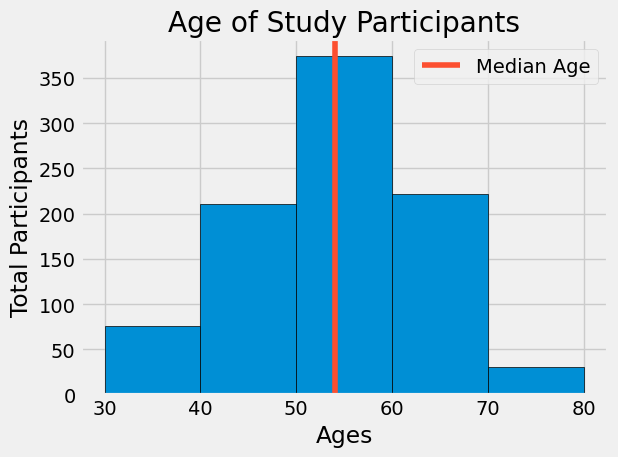

In [4]:
plt.style.use('fivethirtyeight')

heart_data = pd.read_csv('heart.csv')
ages = heart_data['Age']

bins = [30, 40, 50, 60, 70, 80]

plt.hist(ages, bins=bins, edgecolor='black')

median_age = 54
color = '#fc4f30'

plt.axvline(median_age, color=color, label='Median Age')

plt.legend()

plt.title('Age of Study Participants')
plt.xlabel('Ages')
plt.ylabel('Total Participants')

plt.tight_layout()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

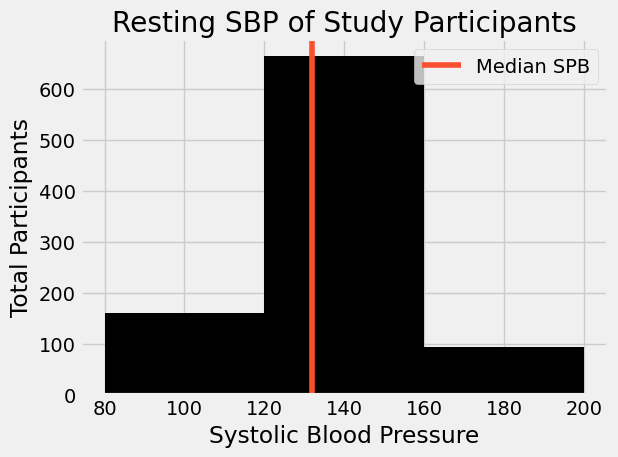

In [5]:
plt.style.use('fivethirtyeight')

heart_data = pd.read_csv('heart.csv')
Average_BP = heart_data['RestingBP']


BP_bins = [80, 120, 160, 200]


plt.hist(Average_BP, bins=BP_bins, color= 'black')

median_SBP = 132
color = '#fc4f30'

plt.axvline(median_SBP, color=color, label='Median SPB')



plt.legend()

plt.title('Resting SBP of Study Participants')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Total Participants')

plt.tight_layout()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

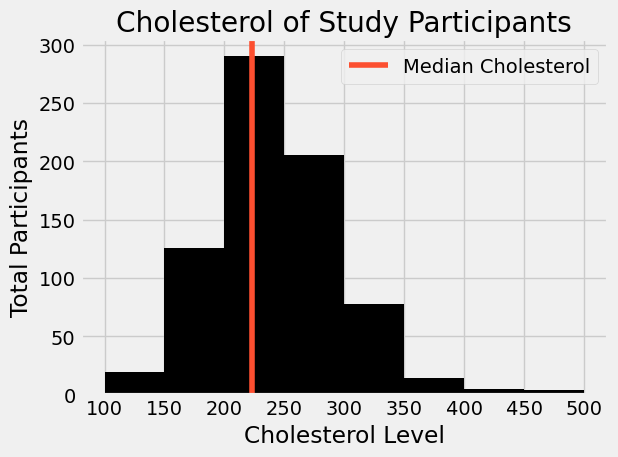

In [6]:
plt.style.use('fivethirtyeight')

heart_data = pd.read_csv('heart.csv')
Average_chol = heart_data['Cholesterol']


chol_bins = [100, 150, 200, 250, 300, 350, 400, 450, 500]


plt.hist(Average_chol, bins=chol_bins, color= 'black')

median_chol = 223
color = '#fc4f30'

plt.axvline(median_chol, color=color, label='Median Cholesterol')



plt.legend()

plt.title('Cholesterol of Study Participants')
plt.xlabel('Cholesterol Level')
plt.ylabel('Total Participants')

plt.tight_layout()



plt.show

In [7]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
18/18 [==============================] - 1s 21ms/step - loss: 3.3800 - accuracy: 0.5145 - val_loss: 2.7715 - val_accuracy: 0.4891
Epoch 2/30
18/18 [==============================] - 0s 4ms/step - loss: 2.3096 - accuracy: 0.5109 - val_loss: 2.2683 - val_accuracy: 0.5217
Epoch 3/30
18/18 [==============================] - 0s 5ms/step - loss: 1.9405 - accuracy: 0.5145 - val_loss: 1.8397 - val_accuracy: 0.4946
Epoch 4/30
18/18 [==============================] - 0s 6ms/step - loss: 1.4971 - accuracy: 0.5345 - val_loss: 1.4362 - val_accuracy: 0.5543
Epoch 5/30
18/18 [==============================] - 0s 5ms/step - loss: 1.0965 - accuracy: 0.6200 - val_loss: 1.1504 - val_accuracy: 0.5978
Epoch 6/30
18/18 [==============================] - 0s 6ms/step - loss: 0.9443 - accuracy: 0.6436 - val_loss: 1.0361 - val_accuracy: 0.6196
Epoch 7/30
18/18 [==============================] - 0s 5ms/step - loss: 0.8679 - accuracy: 0.6673 - val_loss: 0.9763 - val_accuracy: 0.6141
Epoch 8/30
18/18 [=

In [8]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 5ms/step - loss: 0.5562 - accuracy: 0.7500


[0.5562211871147156, 0.75]

In [9]:
model.predict(X_test)

6/6 [==============================] - 0s 4ms/step


array([[0.04703939],
       [0.6476647 ],
       [0.16592921],
       [0.63489854],
       [0.53937006],
       [0.50647134],
       [0.29636753],
       [0.15015857],
       [0.3947783 ],
       [0.20528883],
       [0.92452216],
       [0.92621803],
       [0.26908782],
       [0.74036515],
       [0.28279284],
       [0.79517114],
       [0.8264967 ],
       [0.81408435],
       [0.11892131],
       [0.83387935],
       [0.03677158],
       [0.57193017],
       [0.10111158],
       [0.03400809],
       [0.9017596 ],
       [0.39385495],
       [0.8209738 ],
       [0.6958268 ],
       [0.8550659 ],
       [0.66051644],
       [0.283351  ],
       [0.26359433],
       [0.88983214],
       [0.12142043],
       [0.7886322 ],
       [0.24562436],
       [0.2831899 ],
       [0.83152527],
       [0.41698265],
       [0.85287094],
       [0.41610423],
       [0.51142836],
       [0.9182699 ],
       [0.30979207],
       [0.6185137 ],
       [0.67095923],
       [0.29971305],
       [0.620

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

6/6 [==============================] - 0s 3ms/step - loss: 0.5562 - accuracy: 0.7500
0.75


In [12]:
def model.predict()

SyntaxError: invalid syntax (2123583197.py, line 1)

In [14]:
interface = gr.Interface(fn = model.predict, inputs = gr.inputs.Textbox(lines = 3, placeholder = "Enter patient age..")outputs = 'text')

SyntaxError: invalid syntax (2491544914.py, line 1)

In [ ]:
interface.launch()